## Import libraries

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
from tensorflow.keras.datasets import cifar10
from skimage import color, data, exposure, filters, io, morphology

## Load the data

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Display the data

In [4]:
# Display information about the dataset
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


## Data Preprocessing

### Normalization

In [6]:
# Convert to float32 type and normalize (dividing by 255)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Data Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating a data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # Random rotation up to 15 degrees
    width_shift_range=0.1,   # Horizontal displacement up to 10%
    height_shift_range=0.1,  # Vertical displacement up to 10%
    horizontal_flip=True     # Horizontal turning
)

# Adjusting the generator to the training data
datagen.fit(x_train)

## View part of the data

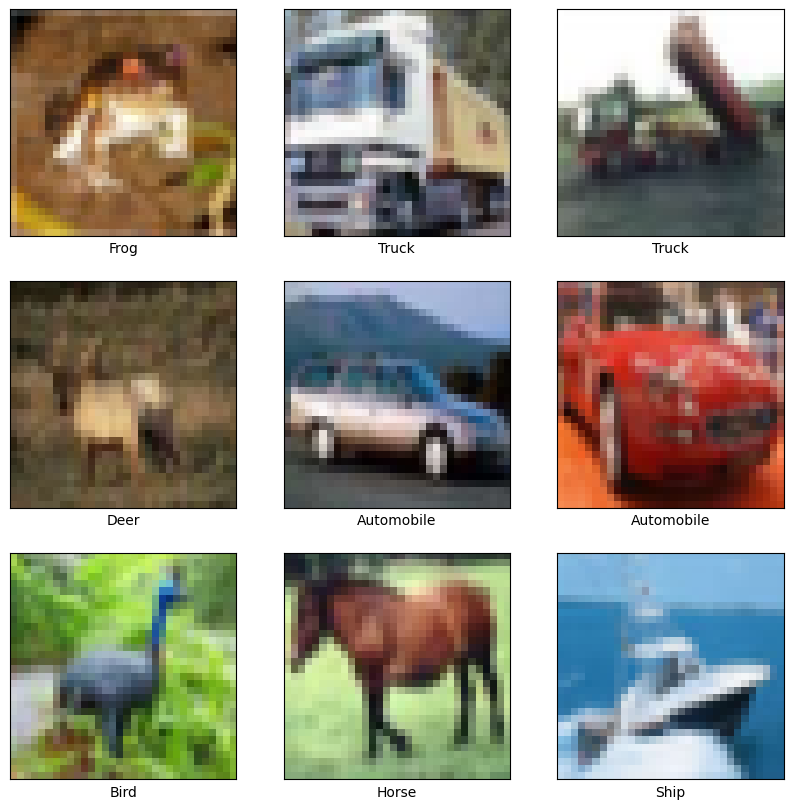

In [25]:
# View some images of the training set
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
           'Dog', 'Frog', 'Horse', 'Ship', 'Truck' ]

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # Convert the label to a number and use it to get the class name
    plt.xlabel(classes[y_train[i][0]])
plt.show()

## Model Architecture (CNN)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Define input form with Input()
model.add(Input(shape=(32, 32, 3)))

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten outlets and add dense coatings
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # CIFAR-10 has 10 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,602 (822.66 KB)

 Trainable params: 210,602 (822.66 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Wait 10 epochs before stopping
    restore_best_weights=True  # Restore the best weights at the end
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,          # Reduce the learning rate by a factor of 0.2
    patience=5,          # Wait 5 seasons without improvement before cutting back
    min_lr=1e-5          # Lower limit for learning rate
)

# Training the model
history = model.fit(
    x_train, y_train,                 # Training data
    epochs=5,                         # Maximum number of epochs
    batch_size=32,                    # Lot size
    validation_data=(x_test, y_test), # Validation data
    callbacks=[early_stopping, reduce_lr]  # Add callbacks
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 725s 456ms/step - accuracy: 0.2365 - loss: 2.1158 - val_accuracy: 0.4904 - val_loss: 1.4845 - learning_rate: 1.0000e-04
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 846s 541ms/step - accuracy: 0.4483 - loss: 1.5715 - val_accuracy: 0.5254 - val_loss: 1.3541 - learning_rate: 1.0000e-04
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1001s 640ms/step - accuracy: 0.4965 - loss: 1.4370 - val_accuracy: 0.5481 - val_loss: 1.2880 - learning_rate: 1.0000e-04
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 970s 620ms/step - accuracy: 0.5264 - loss: 1.3540 - val_accuracy: 0.5589 - val_loss: 1.2497 - learning_rate: 1.0000e-04
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 524s 335ms/step - accuracy: 0.5441 - loss: 1.3153 - val_accuracy: 0.5728 - val_loss: 1.2181 - learning_rate: 1.0000e-04


### Display the results

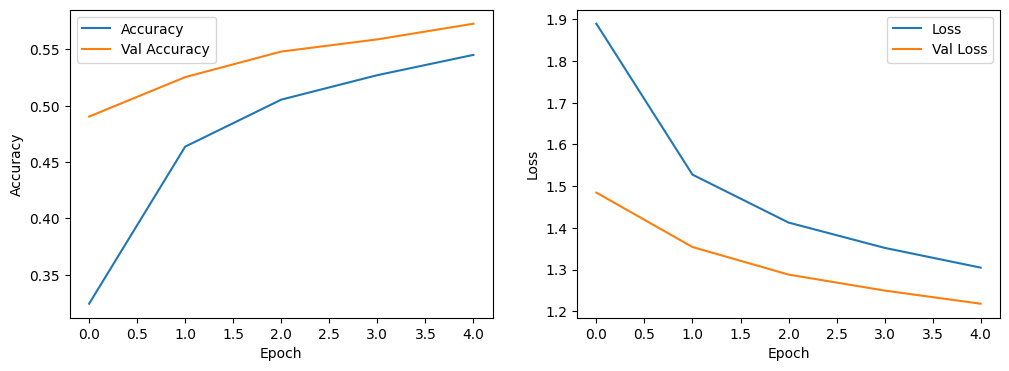

In [20]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 116s - 371ms/step - accuracy: 0.5728 - loss: 1.2181
Test Accuracy: 0.5728


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Wait 10 epochs before stopping
    restore_best_weights=True  # Restore the best weights at the end
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,          # Reduce the learning rate by a factor of 0.2
    patience=5,          # Wait 5 seasons without improvement before cutting back
    min_lr=1e-5          # Lower limit for learning rate
)

# Training the model
history = model.fit(
    x_train, y_train,                 # Training data
    epochs=20,                        # Maximum number of epochs
    batch_size=32,                    # Lot size
    validation_data=(x_test, y_test), # Validation data
    callbacks=[early_stopping, reduce_lr]  # Add callbacks
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.6354 - loss: 1.0396 - val_accuracy: 0.6768 - val_loss: 0.9376 - learning_rate: 0.0010
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.6485 - loss: 1.0098 - val_accuracy: 0.6631 - val_loss: 0.9740 - learning_rate: 0.0010
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.6595 - loss: 0.9846 - val_accuracy: 0.6916 - val_loss: 0.8936 - learning_rate: 0.0010
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.6642 - loss: 0.9583 - val_accuracy: 0.6951 - val_loss: 0.8808 - learning_rate: 0.0010
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.6744 - loss: 0.9472 - val_accuracy: 0.6905 - val_loss: 0.9061 - learning_rate: 0.0010
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 90ms/step - accuracy: 0.6799 - loss: 0.9331 - val_accuracy: 0.6967 - val_loss: 0.8795 - learning_rate: 0.0010
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step -

In [19]:
# Salvar o histórico de treino
import pickle

with open('training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

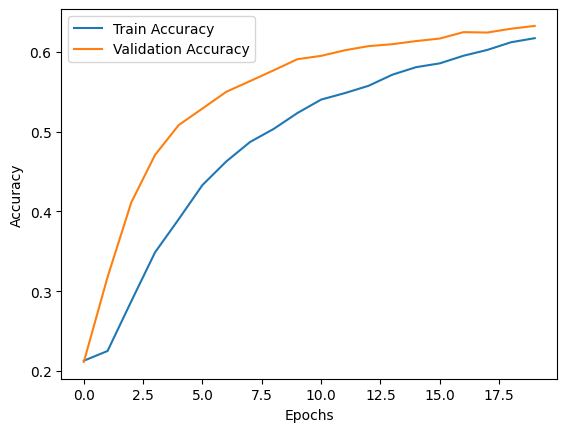

In [20]:
# Carregar o histórico salvo para análise
with open('training_history.pkl', 'rb') as file_pi:
    saved_history = pickle.load(file_pi)

# Plotar o histórico de treino
import matplotlib.pyplot as plt

plt.plot(saved_history['accuracy'], label='Train Accuracy')
plt.plot(saved_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Display the results

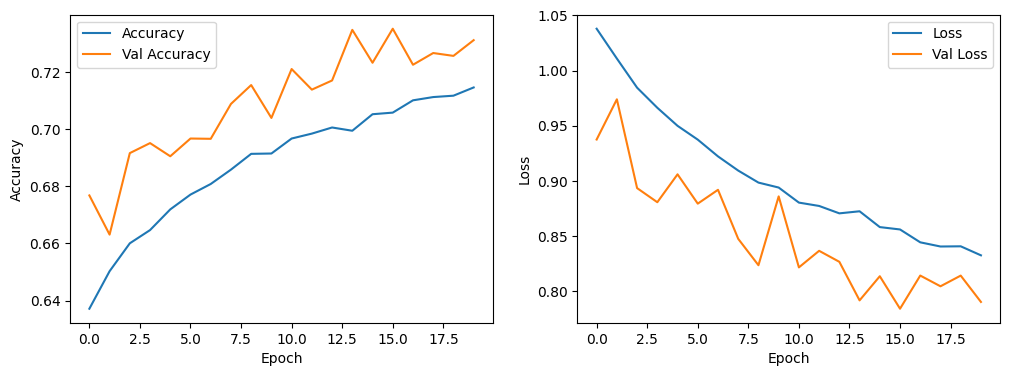

In [14]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Evaluation

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 6s - 20ms/step - accuracy: 0.7351 - loss: 0.7844
Test Accuracy: 0.7351


### Metrics Calculation (Precision, Recall and F1-Score)

In [18]:
from sklearn.metrics import classification_report

# Obtain predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

# Generate a classification report
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 362ms/step
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1000
           1       0.69      0.70      0.70      1000
           2       0.57      0.48      0.52      1000
           3       0.47      0.50      0.49      1000
           4       0.57      0.57      0.57      1000
           5       0.63      0.53      0.57      1000
           6       0.65      0.73      0.69      1000
           7       0.69      0.67      0.68      1000
           8       0.73      0.73      0.73      1000
           9       0.64      0.69      0.66      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



### Visualization of the Confusion Matrix

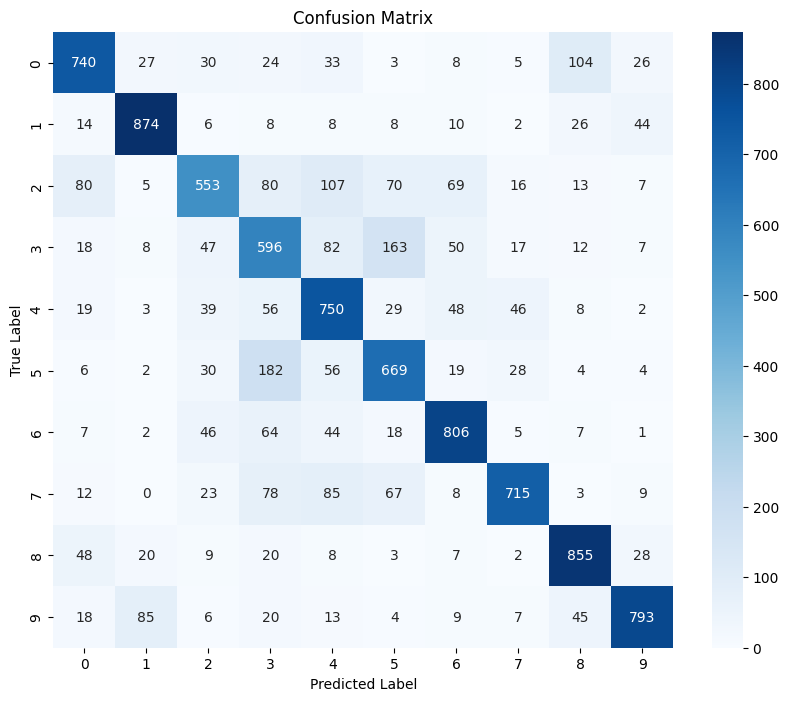

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Transfer Learning

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Loading the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model so that they are not trained.
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers to the model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# See the structure of the model
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,57

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 396,554 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
# Training the model with Transfer Learning
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 478s 304ms/step - accuracy: 0.1872 - loss: 13.5271 - val_accuracy: 0.2114 - val_loss: 2.1875 - learning_rate: 1.0000e-04
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 446s 285ms/step - accuracy: 0.2132 - loss: 2.4738 - val_accuracy: 0.3177 - val_loss: 2.0388 - learning_rate: 1.0000e-04
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 504s 287ms/step - accuracy: 0.2727 - loss: 2.0863 - val_accuracy: 0.4113 - val_loss: 1.7796 - learning_rate: 1.0000e-04
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 467s 299ms/step - accuracy: 0.3390 - loss: 1.8680 - val_accuracy: 0.4708 - val_loss: 1.6096 - learning_rate: 1.0000e-04
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 447s 286ms/step - accuracy: 0.3827 - loss: 1.7453 - val_accuracy: 0.5083 - val_loss: 1.4940 - learning_rate: 1.0000e-04
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 472s 302ms/step - accuracy: 0.4212 - loss: 1.6380 - val_accuracy: 0.5290 - val_loss: 1.4268 - learning_rate: 1.0000e-04
Epoch 7/20
1563/1563 ━━━━━━

In [16]:
# Evaluation of the transferred model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Transfer Learning Model Accuracy: {test_accuracy:.4f}")

313/313 - 102s - 327ms/step - accuracy: 0.6325 - loss: 1.1089
Transfer Learning Model Accuracy: 0.6325


## Unfreezing the model and retraining again

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels for one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Unfreeze all layers
for layer in model.layers:
    layer.trainable = True

# Recompile the template
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Training the model
history = model.fit(
    x_train, 
    y_train, 
    epochs=5, 
    validation_data=(x_test, y_test)
)

In [32]:
# Save the best model
model.save('best_model.h5')

In [34]:
import os
from PIL import Image
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Create a directory to save images
output_dir = 'test_images'
os.makedirs(output_dir, exist_ok=True)

# Extract a small subset of images (e.g., 5 images) from x_test
subset_size = 5
x_test_subset = x_test[:subset_size]

# Save each image in the output directory
for i, img in enumerate(x_test_subset):
    img_pil = Image.fromarray(img)
    img_path = os.path.join(output_dir, f'test_image_{i+1}.png')
    img_pil.save(img_path)

print(f"Saved images to {output_dir}")

Saved images to test_images
